In [16]:
import cv2
import numpy as np
import math
from skimage.exposure import rescale_intensity
from matplotlib import pyplot as plt

## part 1

In [17]:
def myConvolve(img_array,Gx,Gy):
    r , c = np.shape(img_array)
    output_array = np.empty([(r-2)*(c-2)])
    i=0
    for x in range(1,r-1):
        for y in range(1,c-1):
            v = img_array[x-1,y-1]*Gx[0,0]  + img_array[x-1,y]*Gx[0,1] + img_array[x-1,y+1]*Gx[0,2] + img_array[x,y-1]*Gx[1,0] + img_array[x,y]*Gx[1,1] + img_array[x,y+1]*Gx[1,2] + img_array[x+1,y-1]*Gx[2,0] + img_array[x+1,y]*Gx[2,1] + img_array[x+1,y+1]*Gx[2,2]
#             w = img_array[x-1,y-1]*Gy[0,0]  + img_array[x-1,y]*Gy[0,1] + img_array[x-1,y+1]*Gy[0,2] + img_array[x,y-1]*Gy[1,0] + img_array[x,y]*Gy[1,1] + img_array[x,y+1]*Gy[1,2] + img_array[x+1,y-1]*Gy[2,0] + img_array[x+1,y]*Gy[2,1] + img_array[x+1,y+1]*Gy[2,2]
            output_array[i] = math.sqrt((v**2))
            i=i+1

    output = np.reshape(output_array, (r-2,c-2)) #(-1,r-2)
    print(output.shape)
    return output


In [18]:
def highboost(im):
#     gauss_mask = cv2.GaussianBlur(im, (9, 9), 10.0)
#     image_sharp = cv2.addWeighted(im, 2, gauss_mask, -1, 0)
#     print(im.shape)
    h = im.shape[0]
    w = im.shape[1]
#     sobx = np.array([ [-1,0,1], [-2,0,2], [-1,0,1]])
#     soby = np.array([ [1,2,1], [0,0,0], [-1,-2,-1]])
    lapx = np.array([ [0,1,0], [1,-4,1], [0,1,0]])
    lapy = np.array([ [1,1,1], [1,-8,1], [1,1,1]])
#     sobx = np.array([ [-1,-1,-1],[-1,-8,-1],[-1,-1,-1]])
#     soby = np.array([ [-1,-1,-1],[-1,-4,-1],[-1,-1,-1]])
    new = myConvolve(im,lapx,lapy)
#     im = im.reshape(new.shape)
    crop_img = im[1:h-1, 1:w-1]
    image_sharp = new+crop_img
    image_sharp = rescale_intensity(image_sharp,in_range=(0,255))
    
    return image_sharp

(512, 343)
(510, 341)


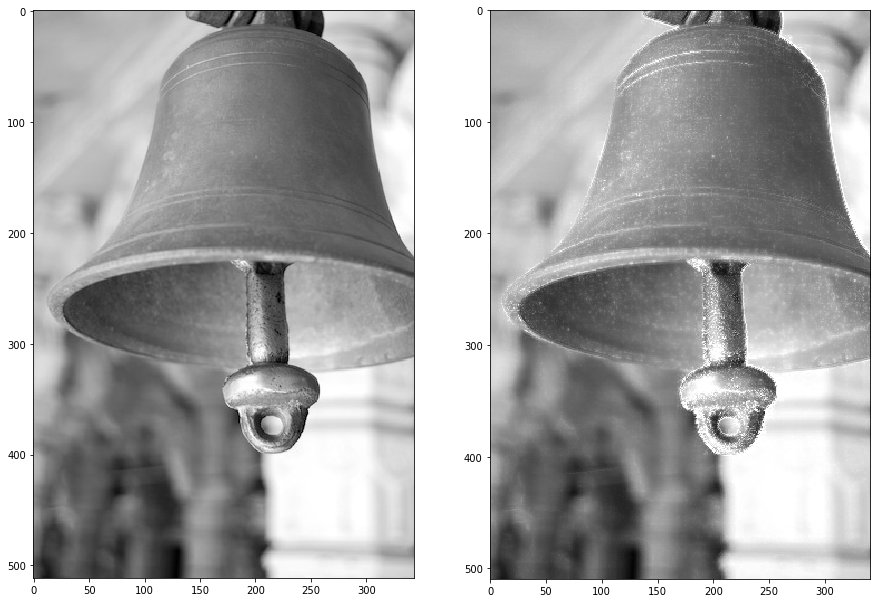

In [19]:
image = cv2.imread("../input_data/bell.jpg",0)
print(image.shape)
image_sharp = highboost(image)

fig, axs = plt.subplots(2,3,figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(image,'gray')
plt.subplot(1,2,2)
plt.imshow(image_sharp,'gray')
plt.show()

## part 2

(1022, 1022)


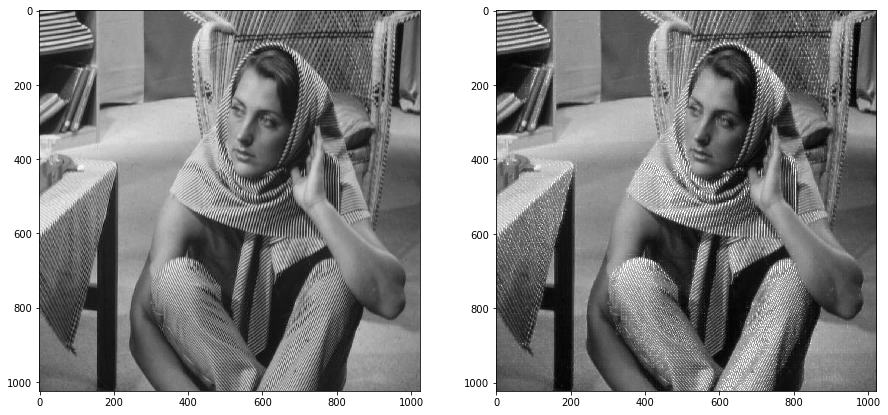

In [20]:
image = cv2.imread("../input_data/barbara.jpg",0)
image_sharp = highboost(image)

fig, axs = plt.subplots(2,3,figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(image,'gray')
plt.subplot(1,2,2)
plt.imshow(image_sharp,'gray')
plt.show()

(185, 219)


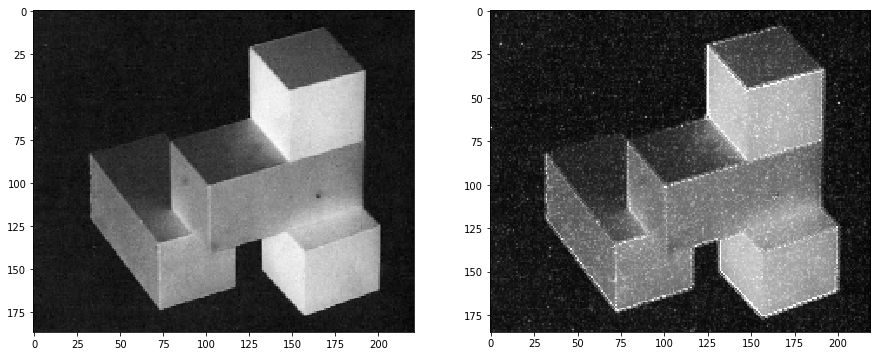

In [21]:
image = cv2.imread("../input_data/cubes.png",0)
image_sharp = highboost(image)

fig, axs = plt.subplots(2,3,figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(image,'gray')
plt.subplot(1,2,2)
plt.imshow(image_sharp,'gray')
plt.show()

## part 3

### Highboost only take care of sharp edges but not the change in intensity but bilinear filter takes in account the change in intensity